In [1]:
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.decomposition import PCA
import pandas as pd
import sklearn.metrics as m
import numpy as np

# Clustering of artifical data

We use the following artifical data imported from sklearn.

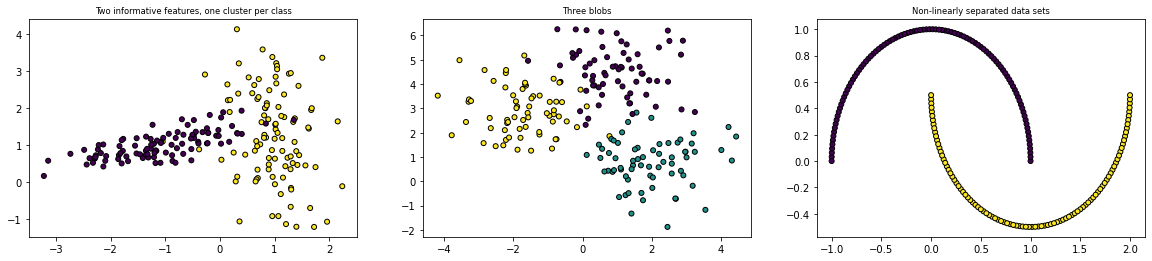

In [74]:
fig,(ax1,ax2,ax3)=plt.subplots(1, 3,figsize=[20,4])

ax1.set_title("Two informative features, one cluster per class", fontsize="small")
X1, Y1 = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2,n_clusters_per_class=1,random_state=0)
ax1.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1,s=25, edgecolor="k")

ax2.set_title("Three blobs", fontsize="small")
X2, Y2 = make_blobs(n_samples=200, n_features=2, centers=3,random_state=0)
ax2.scatter(X2[:, 0], X2[:, 1], marker="o", c=Y2, s=25, edgecolor="k")

ax3.set_title("Non-linearly separated data sets", fontsize="small")
X3, Y3 = make_moons(n_samples=200, shuffle=True, noise=None, random_state=0)
_=ax3.scatter(X3[:, 0], X3[:, 1], marker="o", c=Y3, s=25, edgecolor="k")

Now, we will apply the three clustering methods on this datsets. Obviously, we will set the number of clusters equal to the number of classes, hence two clusters for data set 1 and 3 and three clusters for data set 2.


We evaluate the performance in terms of several score.
<br>For example, we will use the homogeneity score which gives an indication if the members of a cluster are all of a single class.<br>
Overall, we'll use the following scores:

1. Homogeneity score
2. Completeness score
3. V-measure score
4. Adjusted Rand Index
5. Silhouette Score

In the end, we will plot the data in such a way that the clustering label is indicated by the colour.

homogeneity score: 0.18872187554086517
completeness score: 0.18872187554086517
v measure score: 0.18872187554086517
adjusted rand score: 0.24621212121212122
silhouette score: 0.48941214163707103


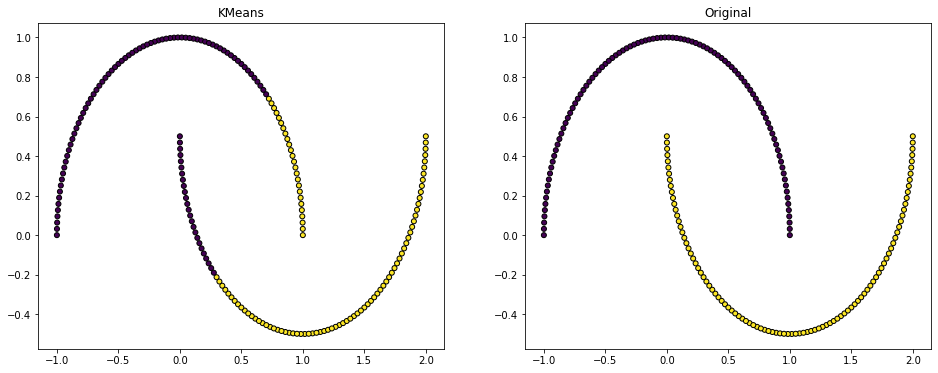

In [114]:
k=2
X=X3
Y=Y3

km = KMeans(n_clusters=k, init="k-means++", max_iter=100, n_init=10,random_state=0)
km.fit(X)

f, (ax1, ax2) = plt.subplots(1, 2,figsize=[16,6])
ax1.set_title("KMeans")
ax1.scatter(X[:, 0], X[:, 1], marker="o",s=25, edgecolor="k", c=km.labels_)
ax2.set_title("Original")
ax2.scatter(X[:, 0], X[:, 1], marker="o", c=Y, s=25, edgecolor="k")

print("homogeneity score: " + str(m.homogeneity_score(Y,km.predict(X))))
print("completeness score: " + str(m.completeness_score(Y,km.predict(X))))
print("v measure score: " + str(m.v_measure_score(Y,km.predict(X))))
print("adjusted rand score: " + str(m.adjusted_rand_score(Y,km.predict(X))))
print("silhouette score: " + str(m.silhouette_score(X,km.predict(X))))


---ward---
homogeneity score: 0.5260231315791051
completeness score: 0.5556061301312019
v measure score: 0.5404100773568737
adjusted rand score: 0.5307136917771185
silhouette score: 0.4378822934137705

---average---
homogeneity score: 0.36926701135176515
completeness score: 0.4282972861387335
v measure score: 0.396597639388205
adjusted rand score: 0.32212343119985426
silhouette score: 0.43999948395558464

---complete---
homogeneity score: 0.3810463422992463
completeness score: 0.38239907716675103
v measure score: 0.3817215112900091
adjusted rand score: 0.47346707076441036
silhouette score: 0.46760715700708105



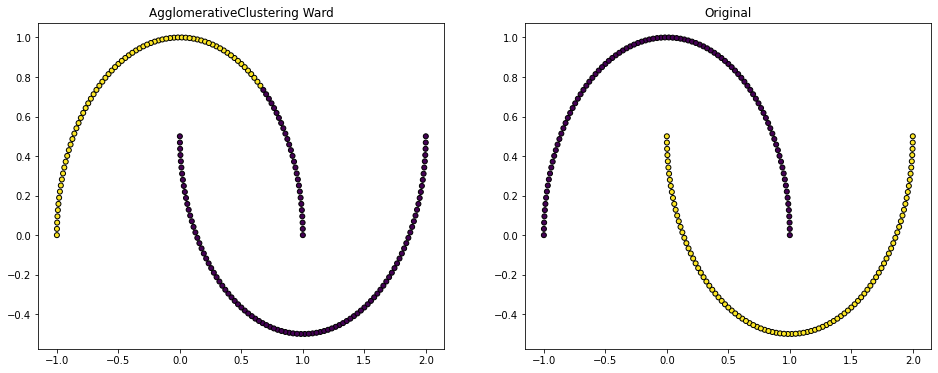

In [115]:
k=2
X=X3
Y=Y3

for linkage in ("ward", "average", "complete"):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=k)
    predictions=clustering.fit_predict(X) 
 
    print("---"+linkage+"---")
    print("homogeneity score: " + str(m.homogeneity_score(Y,predictions)))
    print("completeness score: " + str(m.completeness_score(Y,predictions)))
    print("v measure score: " + str(m.v_measure_score(Y,predictions)))
    print("adjusted rand score: " + str(m.adjusted_rand_score(Y,predictions)))
    print("silhouette score: " + str(m.silhouette_score(X,predictions)))
    print()

clustering = AgglomerativeClustering(linkage="ward", n_clusters=k) 
predictions=clustering.fit_predict(X) 


f, (ax1, ax2) = plt.subplots(1, 2,figsize=[16,6])
ax1.set_title("AgglomerativeClustering Ward")
ax1.scatter(X[:, 0], X[:, 1], marker="o",s=25, edgecolor="k", c=predictions)
ax2.set_title("Original")
_=ax2.scatter(X[:, 0], X[:, 1], marker="o", c=Y, s=25, edgecolor="k")



C:\Users\alexb\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


homogeneity score: 1.0
completeness score: 1.0
v measure score: 1.0
adjusted rand score: 1.0
silhouette score: 0.32831603288410605


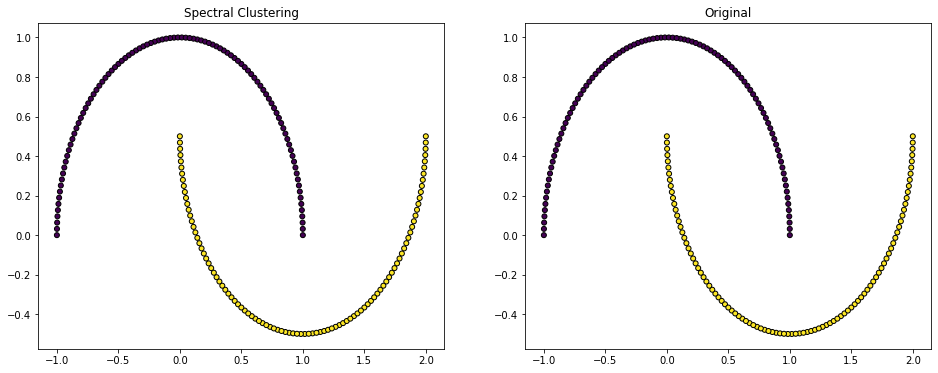

In [119]:
k=2
X=X3
Y=Y3

spectral = cluster.SpectralClustering(n_clusters=k, eigen_solver="arpack",affinity="nearest_neighbors",random_state=0)
prediction=spectral.fit_predict(X)

f, (ax1, ax2) = plt.subplots(1, 2,figsize=[16,6])
ax1.set_title("Spectral Clustering")
ax1.scatter(X[:, 0], X[:, 1], marker="o",s=25, edgecolor="k", c=prediction)
ax2.set_title("Original")
ax2.scatter(X[:, 0], X[:, 1], marker="o", c=Y, s=25, edgecolor="k")

print("homogeneity score: " + str(m.homogeneity_score(Y,prediction)))
print("completeness score: " + str(m.completeness_score(Y,prediction)))
print("v measure score: " + str(m.v_measure_score(Y,prediction)))
print("adjusted rand score: " + str(m.adjusted_rand_score(Y,prediction)))
print("silhouette score: " + str(m.silhouette_score(X,prediction)))

Summary:<br>

1. For the first data set, the KMeans clustering algorithm works best when comparing the given performance scores. However, all methods do not perform too good on this data. For example, the best homogeneity score is about 0.55.<br><br>

2. The second data set is more appropriate for clustering. We see that all algorithms perform better than on the first set while spectral clustering works best. The homogeneity score of spectral clustering is about 0.80 and hence significantly higher than the best one on the first data set.<br><br>

3. We see that Spetral Clustering using nearest neighbours affinity works perfectly for the third datset with a homogeneity score of 1.0. 

# Breast Cancer Set Wisconsin

The data set consists of the following 11 columns. We drop the first column and divide the datset into input data and the classes to predict.<br>
 
 1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)


We normalize the class labels to 0 and 1.
<br> <br>
16 values are missing in the data set which are indicated by a question mark. We drop these rows containing a missing value, so we can work properly with the data set.

In [120]:
column_names=["Sample code number","Clump Thickness","Uniformity of Cell Size","Uniformity of Cell Shape",
"Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Bland Chromatin","Normal Nucleoli",
"Mitoses","Class"
]
bcw=pd.read_table("breast-cancer-wisconsin.data",sep=",",header=0,names=column_names,na_values=["?"])
bcw.dropna(axis=0,inplace=True)
classes=bcw["Class"]/2 -1
data=bcw.iloc[:,1:10]

data


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,4,4,5,7,10.0,3,2,1
1,3,1,1,1,2,2.0,3,1,1
2,6,8,8,1,3,4.0,3,7,1
3,4,1,1,3,2,1.0,3,1,1
4,8,10,10,8,7,10.0,9,7,1
...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,3,2.0,1,1,1
694,2,1,1,1,2,1.0,1,1,1
695,5,10,10,3,7,3.0,8,10,2
696,4,8,6,4,3,4.0,10,6,1


Now, we can apply the clustering methods.
<br>However, we cannot visualize the data as before since we are dealing with higher dimensional data. However, we can apply principal component analysis to project the data into 2-dimensional space. Then, we colour the points in terms of the cluster labels.

homogeneity score: 0.7427342962296636
completeness score: 0.7526442707530255
v measure score: 0.7476564464568899
adjusted rand score: 0.8462703346041845
silhouette score: 0.5965075010416073


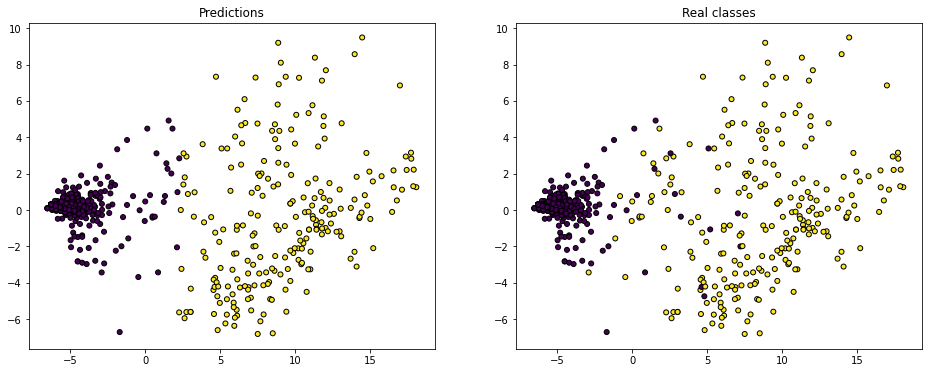

In [122]:
k=2
X=np.array(data)
Y=np.array(classes) 
km = KMeans(n_clusters=k, init="k-means++", random_state=0)
km.fit(X)
predictions=km.predict(X)

print("homogeneity score: " + str(m.homogeneity_score(Y,predictions)))
print("completeness score: " + str(m.completeness_score(Y,predictions)))
print("v measure score: " + str(m.v_measure_score(Y,predictions)))
print("adjusted rand score: " + str(m.adjusted_rand_score(Y,predictions)))
print("silhouette score: " + str(m.silhouette_score(X,predictions)))


f, (ax1, ax2) = plt.subplots(1, 2,figsize=[16,6])
pca_2d = PCA(n_components=2)
PCs_2d = pca_2d.fit_transform(X)
ax1.scatter(PCs_2d[:,0],PCs_2d[:,1],marker="o", c=predictions,s=25, edgecolor="k")
ax1.set_title('Predictions')
ax2.set_title('Real classes')
_=ax2.scatter(PCs_2d[:,0],PCs_2d[:,1],marker="o", c=Y,s=25, edgecolor="k")




---ward---
homogeneity score: 0.8134265914754623
completeness score: 0.792688589931342
v measure score: 0.802923707183396
adjusted rand score: 0.8688242457031036
silhouette score: 0.5670389783150328

---average---
homogeneity score: 0.6645612575227737
completeness score: 0.6894139633321388
v measure score: 0.6767595202170399
adjusted rand score: 0.781461013097318
silhouette score: 0.5881595155016827

---complete---
homogeneity score: 0.29980286201858863
completeness score: 0.4348075301189114
v measure score: 0.3548998036294699
adjusted rand score: 0.3602268998205568
silhouette score: 0.47522183629266507



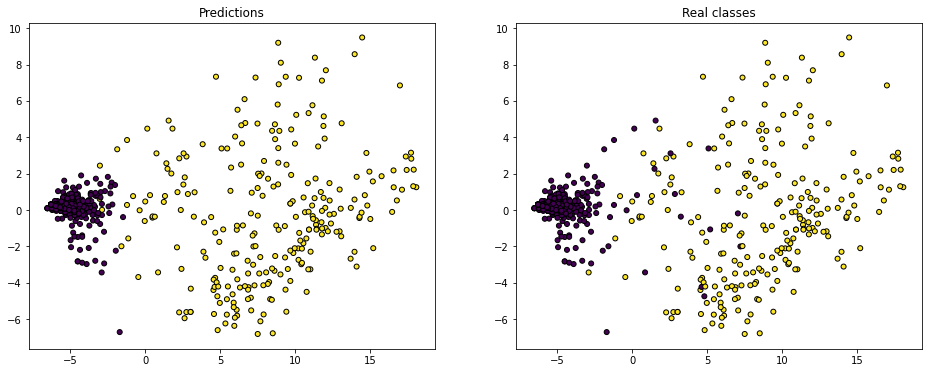

In [123]:
k=2
X=np.array(data)
Y=np.array(classes)
for linkage in ("ward", "average", "complete"):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=k)
    predictions=clustering.fit_predict(X)
    predictions[np.where(predictions==0)]=2
    predictions[np.where(predictions==1)]=0
    predictions[np.where(predictions==2)]=1
    print("---"+linkage+"---")
    print("homogeneity score: " + str(m.homogeneity_score(Y,predictions)))
    print("completeness score: " + str(m.completeness_score(Y,predictions)))
    print("v measure score: " + str(m.v_measure_score(Y,predictions)))
    print("adjusted rand score: " + str(m.adjusted_rand_score(Y,predictions)))
    print("silhouette score: " + str(m.silhouette_score(X,predictions)))
    print()


clustering = AgglomerativeClustering(linkage="ward", n_clusters=k)
predictions=clustering.fit_predict(X)
predictions[np.where(predictions==0)]=2
predictions[np.where(predictions==1)]=0
predictions[np.where(predictions==2)]=1

f, (ax1, ax2) = plt.subplots(1, 2,figsize=[16,6])
pca_2d = PCA(n_components=2)
PCs_2d = pca_2d.fit_transform(X)
ax1.scatter(PCs_2d[:,0],PCs_2d[:,1],marker="o", c=predictions,s=25, edgecolor="k")
ax1.set_title('Predictions')
ax2.set_title('Real classes')
_=ax2.scatter(PCs_2d[:,0],PCs_2d[:,1],marker="o", c=Y,s=25, edgecolor="k")



homogeneity score: 0.8065845838014575
completeness score: 0.7980363931338148
v measure score: 0.8022877193636729
adjusted rand score: 0.8852156735122743
silhouette score: 0.5868630371594203


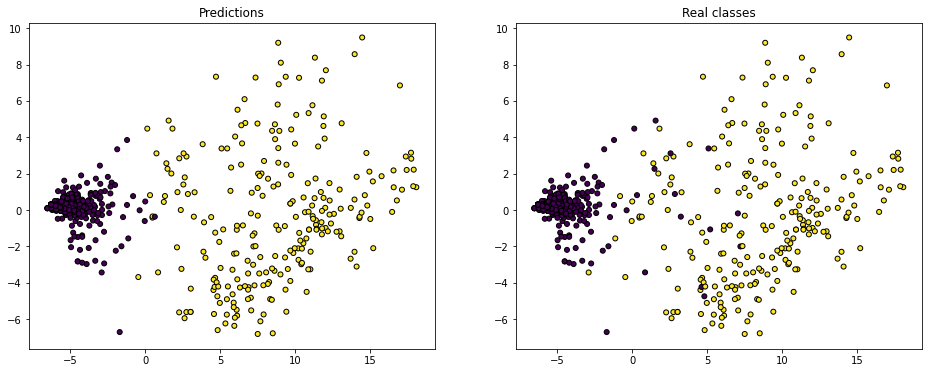

In [124]:
k=2
X=np.array(data)
Y=np.array(classes)

spectral = cluster.SpectralClustering(n_clusters=k, eigen_solver="arpack",affinity="nearest_neighbors",random_state=0)
predictions=spectral.fit_predict(X)

print("homogeneity score: " + str(m.homogeneity_score(Y,predictions)))
print("completeness score: " + str(m.completeness_score(Y,predictions)))
print("v measure score: " + str(m.v_measure_score(Y,predictions)))
print("adjusted rand score: " + str(m.adjusted_rand_score(Y,predictions)))
print("silhouette score: " + str(m.silhouette_score(X,predictions)))


f, (ax1, ax2) = plt.subplots(1, 2,figsize=[16,6])
pca_2d = PCA(n_components=2)
PCs_2d = pca_2d.fit_transform(X)
ax1.scatter(PCs_2d[:,0],PCs_2d[:,1],marker="o", c=predictions,s=25, edgecolor="k")
ax1.set_title('Predictions')
ax2.set_title('Real classes')
_=ax2.scatter(PCs_2d[:,0],PCs_2d[:,1],marker="o", c=Y,s=25, edgecolor="k")

Summary: <br><br>
We see that Agglomerative Clustering using Ward linkage and Spectral Clustering have similar good performance while the KMeans algorithm is slightly worse. The homogeneity score is about 0.81.<br>
However, we see that the original data set has also some outliers which cannot be predicted correctly by all the clustering algorithms.

# Mice dataset

The data set consists of 77 protein expressions which are listed comlumn-wise. The data is classified in eight classes.

In [131]:
dataset=pd.read_excel("Data_Cortex_Nuclear.xls")
dataset

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


We have again some missing values. However, we do not want to drop all the rows containing a missing value becuase those would be too many. That is why we fill the missing values with the mean of the corresponding columns.

In [139]:
#fill the NaN cells with mean of each column
dataset['DYRK1A_N'].fillna(dataset['DYRK1A_N'].mean(axis=0),inplace=True)
dataset['ITSN1_N'].fillna(dataset['ITSN1_N'].mean(axis=0),inplace=True)
dataset['BDNF_N'].fillna(dataset['BDNF_N'].mean(axis=0),inplace=True)
dataset['NR1_N'].fillna(dataset['NR1_N'].mean(axis=0),inplace=True)
dataset['NR2A_N'].fillna(dataset['NR2A_N'].mean(axis=0),inplace=True)
dataset['pAKT_N'].fillna(dataset['pAKT_N'].mean(axis=0),inplace=True)
dataset['pBRAF_N'].fillna(dataset['pBRAF_N'].mean(axis=0),inplace=True)
dataset['pCAMKII_N'].fillna(dataset['pCAMKII_N'].mean(axis=0),inplace=True)
dataset['pCREB_N'].fillna(dataset['pCREB_N'].mean(axis=0),inplace=True)
dataset['pELK_N'].fillna(dataset['pELK_N'].mean(axis=0),inplace=True)
dataset['pERK_N'].fillna(dataset['pERK_N'].mean(axis=0),inplace=True)
dataset['pJNK_N'].fillna(dataset['pJNK_N'].mean(axis=0),inplace=True)
dataset['PKCA_N'].fillna(dataset['PKCA_N'].mean(axis=0),inplace=True)
dataset['pMEK_N'].fillna(dataset['pMEK_N'].mean(axis=0),inplace=True)
dataset['pNR1_N'].fillna(dataset['pNR1_N'].mean(axis=0),inplace=True)
dataset['pNR2A_N'].fillna(dataset['pNR2A_N'].mean(axis=0),inplace=True)
dataset['pNR2B_N'].fillna(dataset['pNR2B_N'].mean(axis=0),inplace=True)
dataset['pPKCAB_N'].fillna(dataset['pPKCAB_N'].mean(axis=0),inplace=True)
dataset['pRSK_N'].fillna(dataset['pRSK_N'].mean(axis=0),inplace=True)
dataset['AKT_N'].fillna(dataset['AKT_N'].mean(axis=0),inplace=True)
dataset['BRAF_N'].fillna(dataset['BRAF_N'].mean(axis=0),inplace=True)
dataset['CAMKII_N'].fillna(dataset['CAMKII_N'].mean(axis=0),inplace=True)
dataset['CREB_N'].fillna(dataset['CREB_N'].mean(axis=0),inplace=True)
dataset['ELK_N'].fillna(dataset['ELK_N'].mean(axis=0),inplace=True)
dataset['ERK_N'].fillna(dataset['ERK_N'].mean(axis=0),inplace=True)
dataset['GSK3B_N'].fillna(dataset['GSK3B_N'].mean(axis=0),inplace=True)
dataset['JNK_N'].fillna(dataset['JNK_N'].mean(axis=0),inplace=True)
dataset['MEK_N'].fillna(dataset['MEK_N'].mean(axis=0),inplace=True)
dataset['TRKA_N'].fillna(dataset['TRKA_N'].mean(axis=0),inplace=True)
dataset['RSK_N'].fillna(dataset['RSK_N'].mean(axis=0),inplace=True)
dataset['APP_N'].fillna(dataset['APP_N'].mean(axis=0),inplace=True)
dataset['Bcatenin_N'].fillna(dataset['Bcatenin_N'].mean(axis=0),inplace=True)
dataset['SOD1_N'].fillna(dataset['SOD1_N'].mean(axis=0),inplace=True)
dataset['MTOR_N'].fillna(dataset['MTOR_N'].mean(axis=0),inplace=True)
dataset['P38_N'].fillna(dataset['P38_N'].mean(axis=0),inplace=True)
dataset['pMTOR_N'].fillna(dataset['pMTOR_N'].mean(axis=0),inplace=True)
dataset['DSCR1_N'].fillna(dataset['DSCR1_N'].mean(axis=0),inplace=True)
dataset['AMPKA_N'].fillna(dataset['AMPKA_N'].mean(axis=0),inplace=True)
dataset['NR2B_N'].fillna(dataset['NR2B_N'].mean(axis=0),inplace=True)
dataset['pNUMB_N'].fillna(dataset['pNUMB_N'].mean(axis=0),inplace=True)
dataset['RAPTOR_N'].fillna(dataset['RAPTOR_N'].mean(axis=0),inplace=True)
dataset['TIAM1_N'].fillna(dataset['TIAM1_N'].mean(axis=0),inplace=True)
dataset['pP70S6_N'].fillna(dataset['pP70S6_N'].mean(axis=0),inplace=True)
dataset['BAD_N'].fillna(dataset['BAD_N'].mean(axis=0),inplace=True)
dataset['BCL2_N'].fillna(dataset['BCL2_N'].mean(axis=0),inplace=True)
dataset['pCFOS_N'].fillna(dataset['pCFOS_N'].mean(axis=0),inplace=True)
dataset['H3AcK18_N'].fillna(dataset['H3AcK18_N'].mean(axis=0),inplace=True)
dataset['EGR1_N'].fillna(dataset['EGR1_N'].mean(axis=0),inplace=True)
dataset['H3MeK4_N'].fillna(dataset['H3MeK4_N'].mean(axis=0),inplace=True)


We drop the unneccesary columns and we replace the name of the classes by numbers from 0 to 7.

In [140]:
data=dataset.drop(["MouseID",'Genotype','Treatment','Behavior','class'], axis=1)
classes = np.vectorize({'c-CS-m':0,'c-CS-s':1,'c-SC-m':2,'c-SC-s':3,'t-CS-m':4,'t-CS-s':5,'t-SC-m':6,'t-SC-s':7}.get)(dataset['class'])
data

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.134762,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,0.134762,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,0.134762,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,0.134762,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,0.134762,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.275547,0.190483,0.134762,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.283207,0.190463,0.134762,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.290843,0.216682,0.134762,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.306701,0.222263,0.134762,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031


Now, the data set is ready and we can apply the clustering algorithms.

In [149]:
k=8
X=np.array(data)
Y=np.array(classes) 
km = KMeans(n_clusters=k, init="k-means++",random_state=0)
km.fit(X)
predictions=km.predict(X)

print("homogeneity score: " + str(m.homogeneity_score(Y,predictions)))
print("completeness score: " + str(m.completeness_score(Y,predictions)))
print("v measure score: " + str(m.v_measure_score(Y,predictions)))
print("adjusted rand score: " + str(m.adjusted_rand_score(Y,predictions)))
print("silhouette score: " + str(m.silhouette_score(X,predictions)))




homogeneity score: 0.24141008516657278
completeness score: 0.25451151465423255
v measure score: 0.24778774084755673
adjusted rand score: 0.13720674287695478
silhouette score: 0.20834677960769898


In [150]:
k=8
X=np.array(data)
Y=np.array(classes)
for linkage in ("ward", "average", "complete"):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=k)
    predictions=clustering.fit_predict(X)
    print("---"+linkage+"---")
    print("homogeneity score: " + str(m.homogeneity_score(Y,predictions)))
    print("completeness score: " + str(m.completeness_score(Y,predictions)))
    print("v measure score: " + str(m.v_measure_score(Y,predictions)))
    print("adjusted rand score: " + str(m.adjusted_rand_score(Y,predictions)))
    print("silhouette score: " + str(m.silhouette_score(X,predictions)))
    print()


---ward---
homogeneity score: 0.24067239230041135
completeness score: 0.2613549843322434
v measure score: 0.2505876461988392
adjusted rand score: 0.12795723072186602
silhouette score: 0.14327930477951883

---average---
homogeneity score: 0.11521377718233701
completeness score: 0.23325737196212404
v measure score: 0.15424211126437143
adjusted rand score: 0.04388166057466632
silhouette score: 0.2018075140682901

---complete---
homogeneity score: 0.13975033347004587
completeness score: 0.20536739692859934
v measure score: 0.16632099528178687
adjusted rand score: 0.09272811802273552
silhouette score: 0.17413520583527148



homogeneity score: 0.4280647320279492
completeness score: 0.4886376379677238
v measure score: 0.45634994825291236
adjusted rand score: 0.29901868485008787
silhouette score: 0.1046230723895603


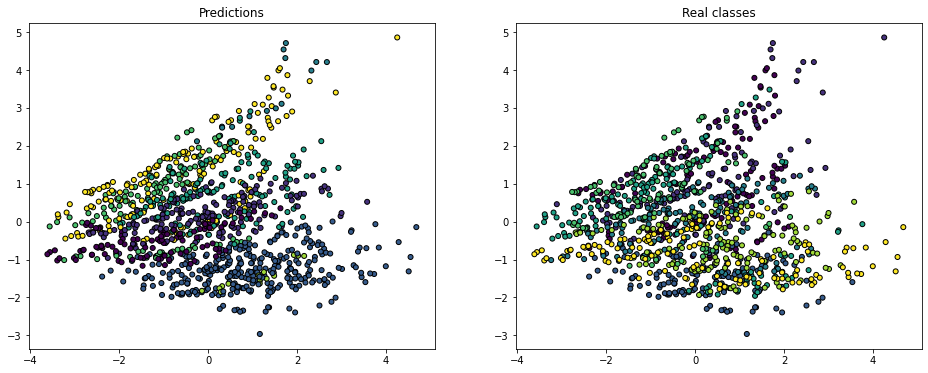

In [151]:
k=8
X=np.array(data)
Y=np.array(classes)

spectral = cluster.SpectralClustering(n_clusters=k, eigen_solver="arpack",affinity="nearest_neighbors",random_state=0)
predictions=spectral.fit_predict(X)

print("homogeneity score: " + str(m.homogeneity_score(Y,predictions)))
print("completeness score: " + str(m.completeness_score(Y,predictions)))
print("v measure score: " + str(m.v_measure_score(Y,predictions)))
print("adjusted rand score: " + str(m.adjusted_rand_score(Y,predictions)))
print("silhouette score: " + str(m.silhouette_score(X,predictions)))


f, (ax1, ax2) = plt.subplots(1, 2,figsize=[16,6])
pca_2d = PCA(n_components=2)
PCs_2d = pca_2d.fit_transform(X)
ax1.scatter(PCs_2d[:,0],PCs_2d[:,1],marker="o", c=predictions,s=25, edgecolor="k")
ax1.set_title('Predictions')
ax2.set_title('Real classes')
_=ax2.scatter(PCs_2d[:,0],PCs_2d[:,1],marker="o", c=Y,s=25, edgecolor="k")

We used again principal component analysis to project the data into 2-dimensional space. However, this time the original dimension and the number of classes is too high, so that the visualization is not as nice as with breast cancer data set.

Summary:<br>

The clustering performance is not as good as with breast cancer dataset. Here, the spetral clustering algorithm performs best with an homogeneity score of 0.43. 